<a href="https://colab.research.google.com/github/Chanwoo18/Deeplearning_Practice/blob/main/deeplearning_project_1_regression_LaptopPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/laptopPrice.csv")

In [ ]:
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
819,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
820,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
821,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

brand                0
graphic_card_gb      0
Number of Ratings    0
rating               0
Price                0
msoffice             0
Touchscreen          0
warranty             0
weight               0
os_bit               0
processor_brand      0
os                   0
hdd                  0
ssd                  0
ram_type             0
ram_gb               0
processor_gnrtn      0
processor_name       0
Number of Reviews    0
dtype: int64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Price,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,38999,65,5,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
2,39999,8,1,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,1,0,0
3,69990,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
4,26990,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0


In [ ]:
df_corr = df.corr()

In [ ]:
df_corr_sort=df_corr.sort_values('Price',ascending=False)

In [ ]:
df_corr_sort.head(10)

,Price,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
Price,1.000000,-0.140392,-0.148738,0.312112,0.032036,-0.033819,-0.166272,-0.030649,-0.039079,0.123952,...,-0.045241,-0.189126,0.189126,0.105752,-0.105752,0.019978,-0.041270,0.091971,-0.126505,0.151091
ssd_1024 GB,0.542465,-0.099904,-0.098997,0.082874,0.196817,-0.024433,-0.150404,-0.041592,-0.069483,0.033600,...,-0.026283,-0.098374,0.098374,0.059255,-0.059255,-0.019488,-0.007314,0.090052,-0.099079,0.047457
ram_gb_16 GB,0.501262,-0.117898,-0.114422,0.113834,0.035076,-0.045989,-0.125879,0.045792,-0.038682,0.089714,...,-0.048701,-0.056300,0.056300,0.015178,-0.015178,0.034228,0.030267,0.049592,-0.062237,0.011972
processor_name_Core i7,0.377777,-0.091590,-0.088557,-0.073713,-0.009955,0.141624,-0.112386,0.017523,0.007080,0.169169,...,0.051666,-0.077908,0.077908,0.049381,-0.049381,0.053136,-0.006967,0.100701,-0.109921,0.022280
processor_name_Core i9,0.359096,-0.029737,-0.030426,-0.018594,0.042586,-0.013033,-0.046965,-0.044082,-0.013030,0.026647,...,0.007795,-0.002193,0.002193,0.071338,-0.071338,-0.004890,-0.010418,0.064542,-0.082389,0.075747
graphic_card_gb_6 GB,0.344260,-0.034246,-0.026201,-0.040718,0.074110,-0.028542,-0.072547,-0.064957,-0.069049,0.141202,...,0.031019,0.042935,-0.042935,0.082025,-0.082025,-0.010709,-0.022814,-0.045336,0.035751,0.054392
graphic_card_gb_8 GB,0.325775,-0.038046,-0.037889,-0.024688,-0.045732,-0.017305,-0.062358,0.017369,-0.011119,0.163222,...,0.005383,0.048085,-0.048085,0.015458,-0.015458,-0.006493,-0.013832,0.057208,-0.048126,-0.018523
os_Mac,0.312112,0.159968,0.123298,1.000000,-0.123606,-0.024688,-0.088961,-0.083500,-0.086425,-0.047730,...,-0.134035,0.068598,-0.068598,0.135129,-0.135129,-0.009263,-0.019734,-0.162239,0.159943,0.022119
brand_APPLE,0.312112,0.159968,0.123298,1.000000,-0.123606,-0.024688,-0.088961,-0.083500,-0.086425,-0.047730,...,-0.134035,0.068598,-0.068598,0.135129,-0.135129,-0.009263,-0.019734,-0.162239,0.159943,0.022119
ssd_3072 GB,0.282630,-0.010473,-0.010496,-0.006546,0.052957,-0.004588,-0.016534,-0.015519,-0.016062,-0.008871,...,-0.024911,0.012749,-0.012749,0.025114,-0.025114,-0.001722,-0.003668,-0.030153,-0.037752,0.247708


In [ ]:
df_corr_sort['Price'].head(20)

Price                     1.000000
ssd_1024 GB               0.542465
ram_gb_16 GB              0.501262
processor_name_Core i7    0.377777
processor_name_Core i9    0.359096
graphic_card_gb_6 GB      0.344260
graphic_card_gb_8 GB      0.325775
os_Mac                    0.312112
brand_APPLE               0.312112
ssd_3072 GB               0.282630
processor_brand_M1        0.274581
processor_name_M1         0.274581
processor_name_Ryzen 9    0.253506
weight_Casual             0.247878
hdd_0 GB                  0.239608
processor_gnrtn_12th      0.219060
Touchscreen_Yes           0.189126
ram_type_LPDDR3           0.181314
ram_gb_32 GB              0.178753
ram_type_LPDDR4X          0.173809
Name: Price, dtype: float64

In [ ]:
cols_train = df_corr_sort.columns.values.tolist()

In [ ]:
cols_train=['Number of Ratings','Number of Reviews','brand_APPLE','brand_ASUS','brand_Avita','brand_DELL','brand_HP','brand_Lenovo','brand_MSI','brand_acer','processor_brand_AMD','processor_brand_Intel','processor_brand_M1','processor_name_Celeron Dual','processor_name_Core i3','processor_name_Core i5','processor_name_Core i7','processor_name_Core i9','processor_name_M1']

In [ ]:
cols_train = ['ssd_1024 GB','ram_gb_16 GB','processor_name_Core i7','processor_name_Core i9','graphic_card_gb_6 GB','graphic_card_gb_8 GB','os_Mac','brand_APPLE','ssd_3072 GB','processor_brand_M1','processor_name_M1','processor_name_Ryzen 9','weight_Casual','hdd_0 GB','processor_gnrtn_12th']

In [ ]:
X_train_pre=df[cols_train]

In [ ]:
y = df['Price'].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train_pre,y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                160       
                                                                 
 dense_41 (Dense)            (None, 30)                330       
                                                                 
 dense_42 (Dense)            (None, 40)                1240      
                                                                 
 dense_43 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,771
Trainable params: 1,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=20)

In [ ]:
modelpath = "/content/drive/MyDrive/laptopPriceRegression.hdf5"

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=0,save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=1000,batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/1000
16/16 [==============================] - 1s 30ms/step - loss: 7889789440.0000 - val_loss: 8592927744.0000
Epoch 2/1000
16/16 [==============================] - 0s 7ms/step - loss: 7889680896.0000 - val_loss: 8592787456.0000
Epoch 3/1000
16/16 [==============================] - 0s 6ms/step - loss: 7889508864.0000 - val_loss: 8592547840.0000
Epoch 4/1000
16/16 [==============================] - 0s 8ms/step - loss: 7889211392.0000 - val_loss: 8592113664.0000
Epoch 5/1000
16/16 [==============================] - 0s 6ms/step - loss: 7888674816.0000 - val_loss: 8591358976.0000
Epoch 6/1000
16/16 [==============================] - 0s 9ms/step - loss: 7887735808.0000 - val_loss: 8590076928.0000
Epoch 7/1000
16/16 [==============================] - 0s 7ms/step - loss: 7886161408.0000 - val_loss: 8587898368.0000
Epoch 8/1000
16/16 [==============================] - 0s 7ms/step - loss: 7883610112.0000 - val_loss: 8584434176.0000
Epoch 9/1000
16/16 [==============================] - 0

In [ ]:
real_prices=[]
pred_prices=[]
X_num=[]

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(50):
  real = y_test[i]
  prediction = Y_prediction[i]
  print("실제가격 : {:,.2f}, 예상가격 : {:,.2f}".format(real,prediction))
  real_prices.append(real)
  pred_prices.append(prediction)
  n_iter = n_iter +1
  X_num.append(n_iter)

6/6 [==============================] - 0s 2ms/step
실제가격 : 43,970.00, 예상가격 : 55,839.23
실제가격 : 65,990.00, 예상가격 : 85,210.56
실제가격 : 54,990.00, 예상가격 : 65,356.55
실제가격 : 125,394.00, 예상가격 : 44,625.57
실제가격 : 49,490.00, 예상가격 : 65,356.55
실제가격 : 49,990.00, 예상가격 : 54,142.88
실제가격 : 41,999.00, 예상가격 : 54,142.88
실제가격 : 79,990.00, 예상가격 : 65,356.55
실제가격 : 63,990.00, 예상가격 : 55,839.23
실제가격 : 53,400.00, 예상가격 : 65,356.55
실제가격 : 84,990.00, 예상가격 : 98,874.15
실제가격 : 44,427.00, 예상가격 : 55,839.23
실제가격 : 89,390.00, 예상가격 : 85,210.56
실제가격 : 192,990.00, 예상가격 : 209,634.91
실제가격 : 309,990.00, 예상가격 : 138,964.39
실제가격 : 71,990.00, 예상가격 : 65,356.55
실제가격 : 37,990.00, 예상가격 : 65,356.55
실제가격 : 129,990.00, 예상가격 : 124,588.07
실제가격 : 57,490.00, 예상가격 : 55,839.23
실제가격 : 114,990.00, 예상가격 : 65,356.55
실제가격 : 36,990.00, 예상가격 : 44,625.57
실제가격 : 84,990.00, 예상가격 : 65,356.55
실제가격 : 79,990.00, 예상가격 : 85,210.56
실제가격 : 229,900.00, 예상가격 : 117,861.20
실제가격 : 45,650.00, 예상가격 : 65,356.55
실제가격 : 71,990.00, 예상가격 : 55,839.23
실제가격 : 58,100.00, 예상가격 : 65,3

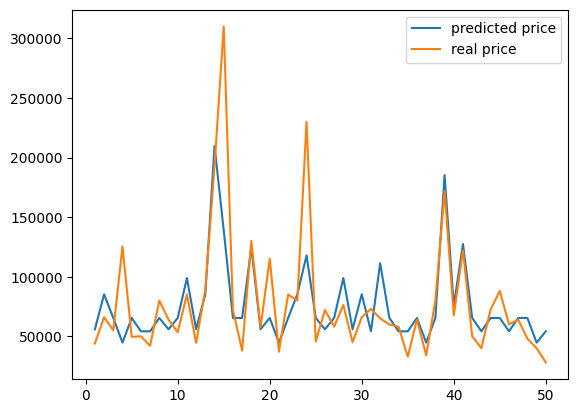

In [ ]:
plt.plot(X_num, pred_prices, label='predicted price')
plt.plot(X_num, real_prices, label='real price')
plt.legend()
plt.show()